# IPython Notebook
the actual data structure of an ipynb is just... json.

## Metadata
<div style="display: inline-block">
<!-- get the table rendered to the left rather than default center, the spaces after the raw html are important for markdown https://stackoverflow.com/a/78525025 -->

| Key | Value |
| :--- | :--- |
| author | [Chris Carl](mailto:chrisbcarl@outlook.com) |
| date | 2025-12-20 |
| dataset | na.csv © 2024 Chris Carl |
| url | https://chriscarl.com |

<!-- get the table rendered to the left rather than default center, the spaces after the raw html are important for markdown https://stackoverflow.com/a/78525025 -->
</div>

## Changelog
- 2025-01-24 - jupyter.ipynb.ipynb - FEATURE: ipynb-matplotlib-widgets
- 2024-12-20 - jupyter.ipynb.ipynb - initial commit

## TOC (Raw HTML Anchors)
* [Setup](#Setup)
* [IPython Notebooks are Just JSON](#just-json)
* [VS Code Shortcuts](#shortcuts)
* [Input/Output Widgets](#input-output-widgets)
* [Useful Magics](#useful-magics)

## LaTeX
$LaTeX$ support available

# Setup <a id="Setup"></a>

In [1]:
# stdlib imports
import __main__
import os
import sys
import pprint
import importlib
import subprocess
from IPython import get_ipython

SCRIPT_FILEPATH = ''
SCRIPT_FILENAME = ''
IPYTHON_SHELL = get_ipython()  # None if running in vanilla python
if IPYTHON_SHELL:
    SCRIPT_DIRPATH = IPYTHON_SHELL.run_line_magic('pwd', ' # %pwd is a "magic" command  https://ipython.readthedocs.io/en/stable/interactive/magics.html')
    if hasattr(__main__, '__vsc_ipynb_file__'):  # vscode
        SCRIPT_FILEPATH = __main__.__vsc_ipynb_file__
    elif hasattr(__main__, '__session__'):  # localhost:8888/notebooks
        SCRIPT_FILEPATH = __main__.__session__
else:
    SCRIPT_FILEPATH = __file__
    SCRIPT_DIRPATH = os.path.dirname(SCRIPT_FILEPATH)

SCRIPT_FILENAME = os.path.splitext(os.path.basename(SCRIPT_FILEPATH))[0]

pprint.pprint(dict(dir=SCRIPT_DIRPATH, fp=SCRIPT_FILEPATH, fn=SCRIPT_FILENAME), indent=2)

packages = {'Werkzeug': 'werkzeug'}  # package name: module name
modules = ['pandas', 'numpy', 'seaborn', 'ipympl', 'ipywidgets']  # , 'paramiko', 'requests'
packages.update({m: m for m in modules})
package, module = '', ''
install_string = ' '.join(packages)
print('this ipynb uses the following packages:', install_string)
try:
    for package, module in packages.items():
        importlib.import_module(module)
except ImportError:
    print(f'executing "pip install {package}"', file=sys.stderr)
    %pip install {install_string}

# third imports
from IPython.display import display
import ipywidgets as widgets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=4, edgeitems=2, linewidth=9999)  # threshold=4,

pd.set_option('display.precision', 4)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 5)  # .describe has 9
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # prevents wrapping when colwidth exceeds width

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    pass

if IPYTHON_SHELL:
    # if sys.platform == 'win32':
    #     res = IPYTHON_SHELL.getoutput('where.exe latex')
    #     latex_exists = res[0].startswith('INFO')
    # else:
    #     res = IPYTHON_SHELL.getoutput('which latex')
    #     latex_exists = bool(res)
    if sys.platform == 'win32':
        res = !where.exe latex
        latex_exists = not res[0].startswith('INFO')
    else:
        res = !which latex
        latex_exists = bool(res)
else:
    if sys.platform == 'win32':
        res = subprocess.check_output('where.exe latex', universal_newlines=True)
        print(res)
        latex_exists = res.startswith('INFO')
    else:
        res = subprocess.check_output('which latex', universal_newlines=True)
        latex_exists = bool(res)

plt.rcParams.update({'text.usetex': latex_exists})  # , 'font.family': 'Helvetica'  # requires latex installed


# command to tell the notebook to plt.show() IN THE NOTEBOOK, otherwise you call plt.show()
%matplotlib inline
# command to tell the notebook to render interactable matplotlib, requires pip install ipympl
# FEATURE: ipynb-matplotlib-widgets
# this is only really usefull when doing ipynb + 3d. otherwise, eh
# %matplotlib widget

5;  # normally the 5 would be printed, adding ; disables the print

# keyboard shortcuts
# 1. Shift + Enter - exec current cell
# 2. Ctrl + Enter - exec the current cell and stay
# 3. Enter - edit mode
# 4. Y - change cell type to code
# 5. M - change the cell type to markdown
# 6. A - insert above current
# 7. B - insert below current

{ 'dir': 'c:\\Users\\chris\\src\\bootstrap\\languages\\python\\jupyter',
  'fn': 'ipynb',
  'fp': 'c:\\Users\\chris\\src\\bootstrap\\languages\\python\\jupyter\\ipynb.ipynb'}
this ipynb uses the following packages: Werkzeug pandas numpy seaborn ipympl ipywidgets


# IPython Notebooks are Just JSON <a id="just-json"></a>

In [2]:
import json
if IPYTHON_SHELL:
    with open(SCRIPT_FILEPATH, 'r', encoding='utf-8', newline='\n') as r:
        body = json.load(r)
        print(json.dumps(body['cells'][0], indent=2))
        print(json.dumps(body['cells'][1], indent=2))
else:
    print('WARNING: NOT RUNNING AN IPYNB, THIS FILE IS NOT A JSON')
    with open(SCRIPT_FILEPATH, 'r', encoding='utf-8', newline='\n') as r:
        body = r.read()
        print(print(repr(body[50:150])))

{
  "cell_type": "markdown",
  "metadata": {},
  "source": [
    "# IPython Notebook\n",
    "the actual data structure of an ipynb is just... json.\n",
    "\n",
    "## Metadata\n",
    "<div style=\"display: inline-block\">\n",
    "<!-- get the table rendered to the left rather than default center, the spaces after the raw html are important for markdown https://stackoverflow.com/a/78525025 -->\n",
    "\n",
    "| Key | Value |\n",
    "| :--- | :--- |\n",
    "| author | [Chris Carl](mailto:chrisbcarl@outlook.com) |\n",
    "| date | 2025-12-20 |\n",
    "| dataset | na.csv \u00a9 2024 Chris Carl |\n",
    "| url | https://chriscarl.com |\n",
    "\n",
    "<!-- get the table rendered to the left rather than default center, the spaces after the raw html are important for markdown https://stackoverflow.com/a/78525025 -->\n",
    "</div>\n",
    "\n",
    "## Changelog\n",
    "- 2025-01-24 - jupyter.ipynb.ipynb - FEATURE: ipynb-matplotlib-widgets\n",
    "- 2024-12-20 - jupyter.ip

# VS Code Keyboard Shortcuts <a id="shortcuts"></a>
[VS Code Keyboard Shortcuts](https://blog.chaitanyashahare.com/posts/vscode-jupyter-notebooks-keyboard-shortcuts/)
1. Shift + Enter - exec current cell
2. Ctrl + Enter - exec the current cell and stay
3. Enter - edit mode
4. Y - change cell type to code
5. M - change the cell type to markdown
6. A - insert above current
7. B - insert below current


# Pandas / Numpy


In [3]:
display(np.arange(1000))  # will display everything thanks to settings

array = np.arange(27).reshape((3,3,3))
array

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [4]:
import string
df = pd.DataFrame([{k: v for k, v in zip(string.ascii_lowercase, np.arange(len(string.ascii_lowercase)))}] * 10)

# display explicitly with non-default behavior
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)


# display with default behavior
df

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
5,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
6,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
7,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
8,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
9,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
9,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25


# Matplotlib

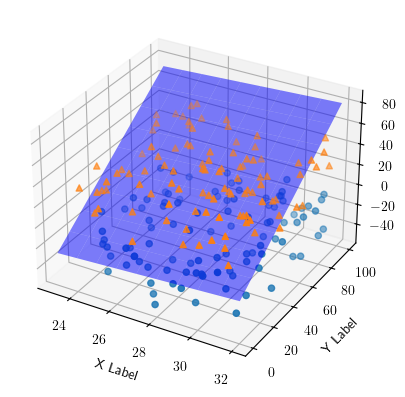

In [5]:

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -5), ('^', 50, 5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

xx, yy = np.meshgrid(np.linspace(23, 32, 10), np.linspace(0, 100, 10))
a, b, c = -50, 1, 1
zz = a + b * xx + c * yy
ax.plot_surface(xx, yy, zz, color='blue', alpha=0.5)  # 2d plane

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# Input/Output Widgets <a id="input-output-widgets"></a>


In [6]:
print('enter some values!')

wgs = []

int_slider = widgets.IntSlider(
    value=69,
    min=0,
    max=100,
    step=1,
    description='int values',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
wgs.append(int_slider)

float_slider = widgets.FloatSlider(
    value=69,
    min=0,
    max=100,
    step=0.01,
    description='float values',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
wgs.append(float_slider)

text_box = widgets.Text(
    value='',
    placeholder='Type something',
    description='Whatever you like',
    disabled=False
)
wgs.append(text_box)


for widget in wgs:
    display(widget)

enter some values!


IntSlider(value=69, continuous_update=False, description='int values')

FloatSlider(value=69.0, continuous_update=False, description='float values', step=0.01)

Text(value='', description='Whatever you like', placeholder='Type something')

In [7]:
def print_widget_values(x):
    print(x)
    for w, widget in enumerate(wgs):
        print(w, widget.value)

button = widgets.Button(
    description='Click me!',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Change the values with the sliders to try things out!',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
display(button)
button.on_click(print_widget_values)


Button(description='Click me!', icon='check', style=ButtonStyle(), tooltip='Change the values with the sliders…

In [8]:
# more display
from IPython.display import Markdown, HTML
display(HTML('<p>paragraph</p></br><p>paragraph</p></br><p>paragraph</p>'))
display(Markdown('|col|col|\n|---|---|\n|a|b|\n|1|2|'))
display(Markdown(r'$\phi$'))

|col|col|
|---|---|
|a|b|
|1|2|

$\phi$

# Useful Magics <a id="useful-magics"></a>


In [9]:
%%time
# %%time has to be at the top of the cell with NOTHING else, not even comments, works like a context manager

# change cli arguments with variables
print_me = 'ipynb'

# run shell commands like installing packages and other wild stuff
stdout = !echo hello {print_me}
print(stdout)

# jupyter nb commands
!jupyter nbconvert --to html --template lab {SCRIPT_FILEPATH}

# WARNING: SEE ipynb.py for IPYTHON_SHELL which replaces get_ipython()
#   the default export just litters get_ipython() everywhere, so it wont work as a normal script...
#   see `ipynb-exported-working.py` for details
!jupyter nbconvert --to python --no-prompt {SCRIPT_FILEPATH}

# # the following line would cause infinite recursion lol
# !jupyter nbconvert --execute --to notebook --inplace {SCRIPT_FILEPATH}

# !pip install matplotlib

['hello ipynb']


[NbConvertApp] Converting notebook c:\Users\chris\src\bootstrap\languages\python\jupyter\ipynb.ipynb to html
[NbConvertApp] Writing 315293 bytes to c:\Users\chris\src\bootstrap\languages\python\jupyter\ipynb.html


CPU times: total: 46.9 ms
Wall time: 2.85 s


[NbConvertApp] Converting notebook c:\Users\chris\src\bootstrap\languages\python\jupyter\ipynb.ipynb to python
[NbConvertApp] Writing 9872 bytes to c:\Users\chris\src\bootstrap\languages\python\jupyter\ipynb.py


In [10]:
%%writefile {os.path.join(SCRIPT_DIRPATH, 'ipynb-magics.txt')}
# %%writefile must be at the top of the cell, cannot be mixed with %%time

Overwriting c:\Users\chris\src\bootstrap\languages\python\jupyter\ipynb-magics.txt
